# Chi-Square Test of Independence Example: Customer Region vs. Support Channel Preference

This notebook demonstrates the Chi-Square test to determine if there is a
statistically significant association between two categorical variables:
customer region and preferred support channel.


## **1. Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Setting plot style
sns.set(style="whitegrid")

## **2. Defining Business Scenario & Goal**

 **Scenario:** A Bangladeshi company offers customer support through multiple channels: Phone, Email, Chat, and FAQ/Self-Service. They want to understand if customers in different geographical regions of the country, that is the eight divisions (Dhaka, Rajshahi, Chittagong, Sylhet, Khulna, Mymensingh, Barisal, Rangpur) have different preferences for these support channels.

**Goal:** Determine if there is a statistically significant association (dependence) between customer region and their preferred support channel. This information can help allocate support resources more effectively.

 **Variables:**
- Categorical Variable 1: Customer Region (Dhaka, Rajshahi, Chittagong, Sylhet, Khulna, Mymensingh, Barisal, Rangpur)
- Categorical Variable 2: Preferred Support Channel (Phone, Email, Chat, FAQ)

## **3. Defining Hypothesis**

**Null Hypothesis (H₀):** Customer region and preferred support channel are independent (There is no association between where a customer lives and the support channel they prefer).

**Alternative Hypothesis (H₁):** Customer region and preferred support channel are dependent (There is an association between where a customer lives and the support channel they prefer).

**Significance Level (α):** We'll set the standard significance level at 0.05.

In [4]:
alpha = 0.05

## **4. Data Representation (Contingency Table)**

In a real scenario, this data would be compiled from customer surveys or support interaction logs.
Here, we'll create a contingency table (also known as a cross-tabulation) with observed frequencies.
Let's assume we surveyed a sample of customers.

Observed frequencies (Example Data)

Rows: Regions (Dhaka, Rajshahi, Chittagong, Sylhet, Khulna, Mymensingh, Barisal, Rangpur)

Columns: Channels (Phone, Email, Chat, FAQ)

In [37]:
# Defining the target counts based on the observed_data DataFrame
target_counts = {
    'Dhaka': {'Phone': 100, 'Email': 120, 'Chat': 130, 'FAQ': 40},
    'Rajshahi': {'Phone': 60, 'Email': 70, 'Chat': 65, 'FAQ': 30},
    'Chittagong': {'Phone': 75, 'Email': 85, 'Chat': 90, 'FAQ': 50},
    'Sylhet': {'Phone': 50, 'Email': 60, 'Chat': 55, 'FAQ': 25},
    'Khulna': {'Phone': 65, 'Email': 75, 'Chat': 80, 'FAQ': 40},
    'Mymensingh': {'Phone': 80, 'Email': 90, 'Chat': 100, 'FAQ': 55},
    'Barisal': {'Phone': 55, 'Email': 65, 'Chat': 70, 'FAQ': 35},
    'Rangpur': {'Phone': 70, 'Email': 80, 'Chat': 85, 'FAQ': 45},
}

In [48]:
# Create the raw data with added noise
raw_data_list = []
for region, channels in target_counts.items():
    for channel, count in channels.items():
        # Generate a single noisy value per count
        noise = int(np.round(np.random.normal(0, count * 0.1)))
        noisy_count = max(0, count + noise)  # Ensure counts are not negative
        for _ in range(noisy_count):
            raw_data_list.append({'Region': region, 'PreferredChannel': channel})

In [49]:
# Convert raw data to a DataFrame
raw_df = pd.DataFrame(raw_data_list)

In [50]:
# Shuffle the DataFrame to make it look more like real raw data
raw_df = raw_df.sample(frac=1, random_state=42).reset_index(drop=True)

print("Sample of Synthetic Raw Customer Data:")
print(raw_df.head())
print(f"\nTotal number of observations in raw data: {len(raw_df)}")

Sample of Synthetic Raw Customer Data:
       Region PreferredChannel
0     Rangpur            Phone
1     Barisal            Email
2  Mymensingh            Email
3     Rangpur             Chat
4      Sylhet            Email

Total number of observations in raw data: 2141


In [60]:
# Creating the Contingency Table from Raw Data
observed_data = pd.crosstab(index=raw_df['Region'], columns=raw_df['PreferredChannel'])

# Reorder columns to match the original desired order for consistency
desired_column_order = ['Phone', 'Email', 'Chat', 'FAQ']
observed_data = observed_data.reindex(columns=desired_column_order, fill_value=0)

# Reorder rows (index) to match the original desired order
desired_index_order = ['Dhaka', 'Rajshahi', 'Chittagong', 'Sylhet', 'Khulna', 'Mymensingh', 'Barisal', 'Rangpur']
observed_data = observed_data.reindex(index=desired_index_order, fill_value=0)

print("\n*Contingency Table* based on Observed Frequencies generated from raw data):")

observed_data



*Contingency Table* based on Observed Frequencies generated from raw data):


PreferredChannel,Phone,Email,Chat,FAQ
Region,,,,
Dhaka,93,116,119,33
Rajshahi,63,66,63,33
Chittagong,66,92,79,46
Sylhet,49,60,55,25
Khulna,67,68,81,41
Mymensingh,77,97,102,59
Barisal,59,64,81,35
Rangpur,76,69,69,38


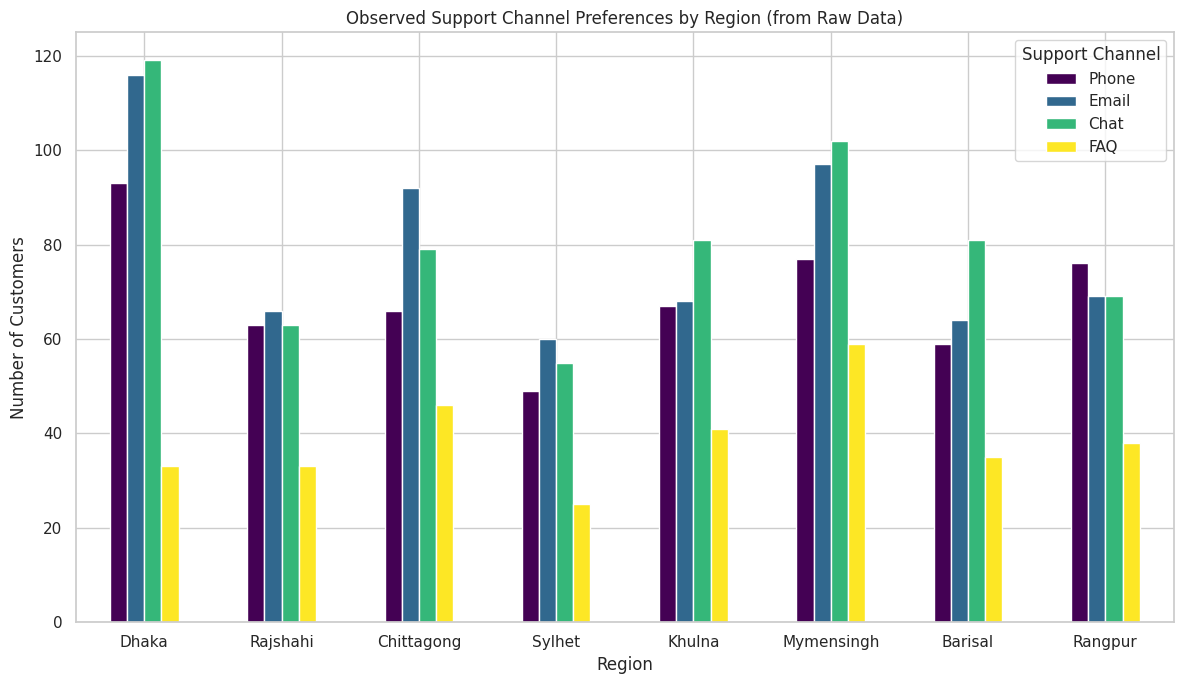

In [58]:
# Visualizing the observed data (from the contingency table)
observed_data.plot(kind='bar', figsize=(12, 7), colormap='viridis')
plt.title('Observed Support Channel Preferences by Region (from Raw Data)')
plt.ylabel('Number of Customers')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.legend(title='Support Channel')
plt.tight_layout()
plt.show()

## **5. Assumption Checks for Chi-Square Test**

The Chi-Square Test of Independence has a few key assumptions:
1. Two Categorical Variables: We have Region and Support Channel (Checked).
2. Independence of Observations: Assumed that each customer is counted only once and their preference is independent of others (Checked by study design).
3. Expected Cell Frequencies: Most (>=80%) expected cell frequencies should be 5 or greater, and none should be less than 1. We check this after calculating expected frequencies.


## **6. Performing Statistical Test (Chi-Square Test)**

We use `scipy.stats.chi2_contingency` which calculates the Chi-square statistic, p-value, degrees of freedom (dof), and expected frequencies.

In [54]:
print("\n--- Performing Chi-Square Test of Independence ---")

chi2_stat, p_value, dof, expected_freq = stats.chi2_contingency(observed_data)

print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
expected_df = pd.DataFrame(expected_freq, index=observed_data.index, columns=observed_data.columns)
expected_df


--- Performing Chi-Square Test of Independence ---
Chi-Square Statistic: 22.3391
P-value: 0.3802
Degrees of Freedom: 21

Expected Frequencies:


PreferredChannel,Phone,Email,Chat,FAQ
Region,,,,
Dhaka,92.737039,106.563288,109.429706,52.269967
Rajshahi,57.800093,66.417562,68.204110,32.578234
Chittagong,72.699673,83.538533,85.785614,40.976179
Sylhet,48.552078,55.790752,57.291453,27.365717
Khulna,66.020551,75.863615,77.904250,37.211583
Mymensingh,86.057917,98.888370,101.548342,48.505371
Barisal,61.396544,70.550210,72.447922,34.605325
Rangpur,64.736105,74.387669,76.388603,36.487623


### **6.1. Check Expected Frequencies Assumption**

In [55]:
print("\n--- Checking Expected Frequency Assumption ---")
min_expected_freq = expected_freq.min()
print(f"Minimum Expected Frequency: {min_expected_freq:.2f}")

if min_expected_freq < 5:
    print("Warning: There are expected frequencies less than 5.")
    # Calculate percentage of cells with expected frequency < 5
    cells_lt_5 = (expected_freq < 5).sum()
    total_cells = expected_freq.size
    percent_lt_5 = (cells_lt_5 / total_cells) * 100
    print(f"Percentage of cells with expected frequency < 5: {percent_lt_5:.2f}%")
    if percent_lt_5 > 20:
        print("Caution: More than 20% of cells have expected frequencies < 5. The Chi-Square test results might be unreliable.")
        print("Consider combining categories or using Fisher's Exact Test if applicable (usually for 2x2 tables or small samples).")
    else:
        print("Less than 20% of cells have expected frequencies < 5. The Chi-Square test is likely still acceptable.")
else:
    print("Assumption met: All expected frequencies are 5 or greater.")


--- Checking Expected Frequency Assumption ---
Minimum Expected Frequency: 27.37
Assumption met: All expected frequencies are 5 or greater.


## **7. Interpretation of Results**

In [56]:
print("\n--- Interpretation ---")
print(f"Significance Level (α): {alpha}")
print(f"P-value from the Chi-Square test: {p_value:.4f}")


--- Interpretation ---
Significance Level (α): 0.05
P-value from the Chi-Square test: 0.3802


In [57]:
# Comparing p-value to alpha
if p_value < alpha:
    print(f"\nConclusion: Reject the Null Hypothesis (H₀).")
    print("There is a statistically significant association between customer region and preferred support channel at the 5% significance level.")
    print("This suggests that support channel preferences differ across regions.")
    # Further analysis (e.g., examining residuals) could pinpoint which specific region/channel combinations contribute most to the association.

else:
    print(f"\nConclusion: Fail to Reject the Null Hypothesis (H₀).")
    print("There is not enough evidence to conclude a statistically significant association between customer region and preferred support channel at the 5% significance level.")
    print("Based on this data, we cannot say that support channel preferences differ significantly across regions.")


Conclusion: Fail to Reject the Null Hypothesis (H₀).
There is not enough evidence to conclude a statistically significant association between customer region and preferred support channel at the 5% significance level.
Based on this data, we cannot say that support channel preferences differ significantly across regions.


**The p-value (0.3802) exceeds the pre-established alpha of 0.05. This leads us not to reject the null hypothesis—suggesting no significant link between the customer region (division) and preferred support channel (Phone, Email, Chat, FAQ) at a significance level of 0.05.**
